# EDA and Base Modeling

In [1]:
# Import of relevant packages

#pip install jupyter pandas plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Set random seed 
RSEED = 42

import warnings
warnings.filterwarnings('ignore')

# plot style
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.facecolor':'white'})



## Load Test and Train Data

In [2]:
# load Train data
Train_data = pd.read_csv('/Users/erdem/neuefische/ML-projects/data/Train.csv')

# load Test data
Test_data = pd.read_csv('/Users/erdem/neuefische/ML-projects/data/Test.csv')

# Variable Definition
VariableDefinition = pd.read_csv('/Users/erdem/neuefische/ML-projects/data/VariableDefinitions.csv')
VariableDefinition


,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


## Getting to know the data

In [3]:
# Overview Train data
Train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
# Overview Test data
Test_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [5]:
Train_data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


### Unique values in relevant columns

In [6]:
Train_data['most_impressing'].value_counts()

Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64

In [7]:
Train_data['travel_with'].value_counts()

Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64

In [8]:
Train_data['payment_mode'].value_counts()

Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: payment_mode, dtype: int64

## Data Cleaning 

In [9]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

## Dealing with missing values

In [10]:
# missing values on train data
missing = pd.DataFrame(Train_data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/Train_data.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage
travel_with,1114,23.16
total_female,3,0.06
total_male,5,0.10
most_impressing,313,6.51


In [11]:
# missing values on test data
missing = pd.DataFrame(Test_data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/Test_data.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage
travel_with,327,20.42
total_female,1,0.06
total_male,2,0.12
most_impressing,111,6.93


In [12]:
# For the travel_with and most_impressing columns, fill in with another category, None
Train_data.travel_with.fillna('None',inplace=True)
Train_data.most_impressing.fillna('None',inplace=True)
# For the female and male columns, fill them with their respective modes
Train_data.total_female.fillna(Train_data.total_female.mode()[0],inplace = True)
Train_data.total_male.fillna(Train_data.total_male.mode()[0],inplace = True)

## Distribution of target variable

In [13]:
Train_data.total_cost.describe()

count    4.809000e+03
mean     8.114389e+06
std      1.222490e+07
min      4.900000e+04
25%      8.121750e+05
50%      3.397875e+06
75%      9.945000e+06
max      9.953288e+07
Name: total_cost, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Costs')

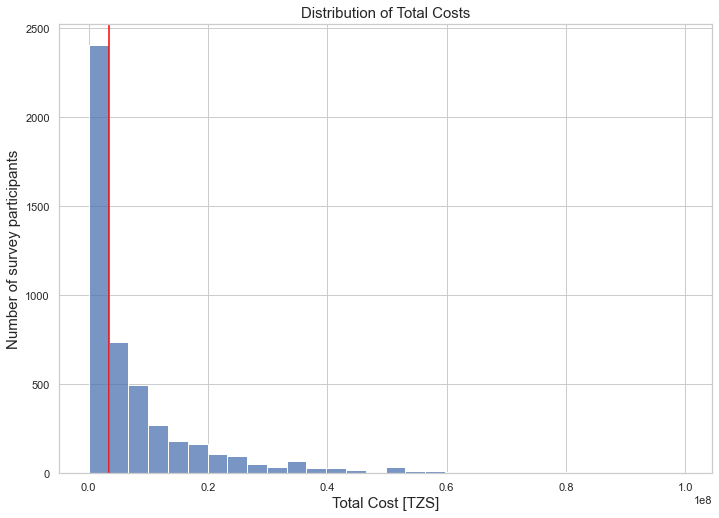

In [14]:
g = sns.histplot(Train_data['total_cost'], bins = 30)
g.axvline(Train_data['total_cost'].median(), color = 'red')
g.set_xlabel("Total Cost [TZS]", fontsize = 15)
g.set_ylabel("Number of survey participants", fontsize = 15)
g.set_title("Distribution of Total Costs", fontsize = 15)

                    total_cost
tour_arrangement              
Independent       2.760664e+06
Package Tour      1.425958e+07


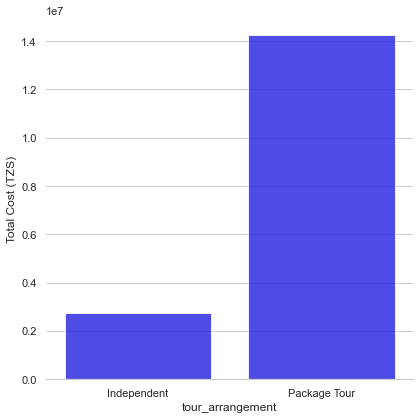

In [15]:

# Total cost sorted by age_group
dfg = pd.DataFrame(Train_data.groupby('tour_arrangement').mean()['total_cost'].sort_values(ascending=True))
print(dfg)
dfg['tour_arrangement'] = dfg.index

g = sns.catplot(
        data=dfg, 
        kind="bar",
        x='tour_arrangement', 
        y="total_cost",
        #hue='first_trip_tz',
        #palette="dark", 
        color='Blue',
        alpha=.8, 
        height=6
        )

g.despine(left=True)
g.set_axis_labels("tour_arrangement", "Total Cost (TZS)");
#plt.xticks(rotation=90);

In [16]:
# Add new column total number of persons
Train_data['total_persons'] = Train_data['total_female'] + Train_data['total_male']

  age_group tour_arrangement  Count
0      1-24      Independent    358
1      1-24     Package Tour    266
2     25-44      Independent   1547
3     25-44     Package Tour    940
4     45-64      Independent    604
5     45-64     Package Tour    787
6       65+      Independent     61
7       65+     Package Tour    246


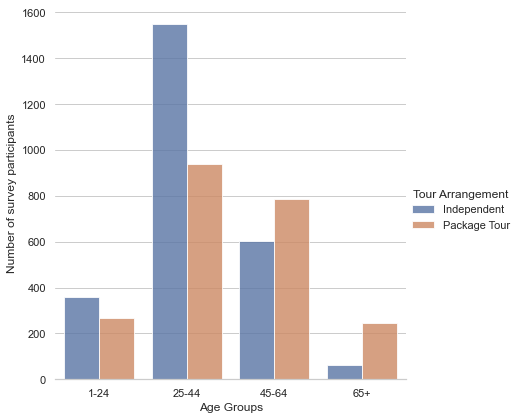

In [17]:
##Total number of visitors sorted by age_group

dfp=Train_data[['age_group', 'tour_arrangement']].groupby(['age_group', 'tour_arrangement']).size().to_frame('Count').reset_index()
print(dfp)

g = sns.catplot(
        data=dfp, 
        kind="bar",
        x='age_group', 
        y="Count",
        hue='tour_arrangement',
        #palette="dark", 
        #color='Blue',
        alpha=.8, 
        height=6
        )

g.despine(left=True)
g.set_axis_labels("Age Groups", "Number of survey participants");
g.legend.set_title("Tour Arrangement")

In [18]:
# Draw a nested barplot 
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=compensation, 
        kind="bar",
        x='age_group', 
        y="Count",
        hue='purpose',
        palette="dark", 
        alpha=.6, 
        height=12
)

g.despine(left=True)
g.set_axis_labels("Age Groups", "Count of surveyed persons")
g.legend.set_title("Purpose")


NameError: name 'compensation' is not defined

In [ ]:
activity = Train_data[['age_group', 'main_activity']].groupby(['age_group', 'main_activity']).size().to_frame('Count').reset_index()
activity

,age_group,main_activity,Count
0,1-24,Beach tourism,138
1,1-24,Bird watching,2
2,1-24,Conference tourism,83
3,1-24,Cultural tourism,107
4,1-24,Hunting tourism,82
5,1-24,Mountain climbing,4
6,1-24,Wildlife tourism,199
7,1-24,business,9
8,25-44,Beach tourism,625
9,25-44,Bird watching,22


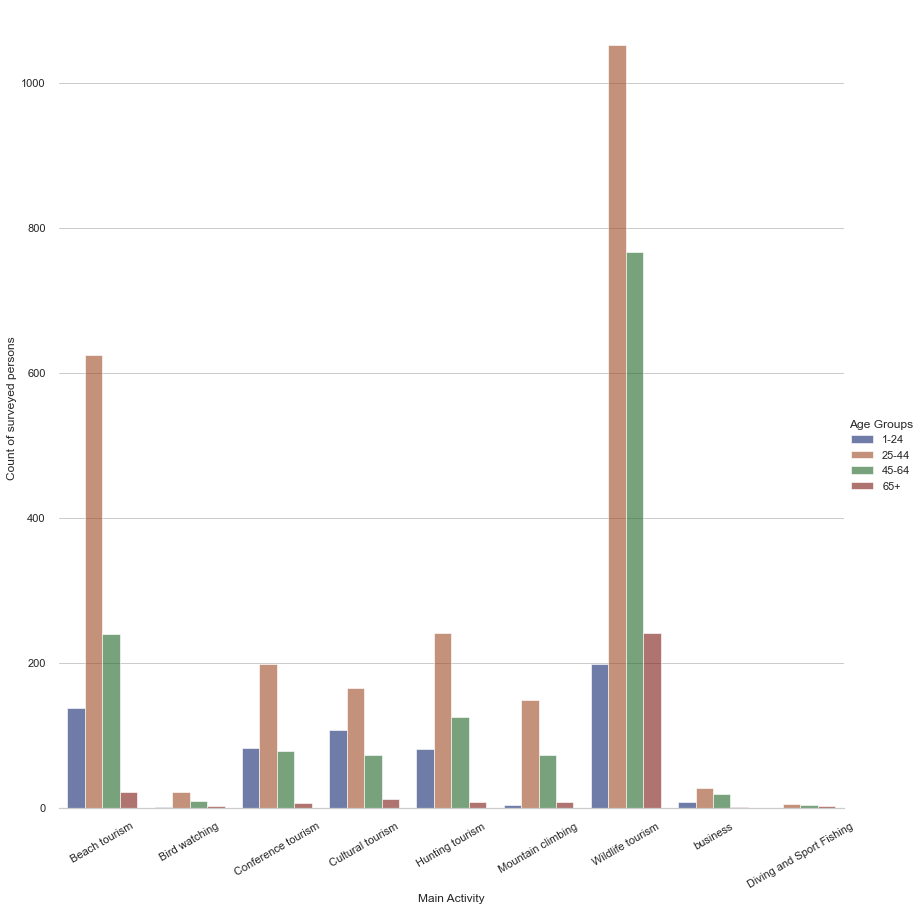

In [ ]:
# Draw a nested barplot 
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=activity, 
        kind="bar",
        x='main_activity', 
        y="Count",
        hue='age_group',
        palette="dark", 
        alpha=.6, 
        height=12
)

g.despine(left=True)
g.set_axis_labels("Main Activity", "Count of surveyed persons")
g.legend.set_title("Age Groups")
g.set_xticklabels(rotation=30);

In [ ]:
Train_data['total_nights'] = Train_data['night_mainland'] + Train_data['night_zanzibar']

In [ ]:
import plotly.offline as ply
import plotly.graph_objs as go
ply.init_notebook_mode(connected=True)

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# total_cost vs. night in mainland


trace1 = go.Scattergl(
    x=Train_data.total_nights,
    y=Train_data.total_cost,
    mode='markers',
    marker=dict(
        opacity=0.5
    ),
    
)
data=[trace1]

layout = go.Layout(
    title='Total cost vs. Total nights',
    xaxis=dict(
        title='Total Nights in Mainland and Zanzibar'
    ),
    yaxis=dict(
        title='Total Cost [TZS]'
    ),
    hovermode='closest',
    
)

fig = go.Figure(data=data, layout=layout)

ply.iplot(fig)

## Map plot

In [ ]:
Train_data['country'].str.title()

0                     Swizerland
1                 United Kingdom
2                 United Kingdom
3                 United Kingdom
4                          China
                  ...           
4804                         Uae
4805    United States Of America
4806                 Netherlands
4807                South Africa
4808              United Kingdom
Name: country, Length: 4809, dtype: object

In [ ]:
Train_data['country_name']=Train_data['country'].str.title()

Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("United States Of America", "United States"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Swizerland", "Switzerland"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Malt", "Malta"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Burgaria", "Bulgaria"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Drc", "Congo"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Korea", "Korea, Republic of"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Uae", "United Arab Emirates"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Russia", "Russian Federation"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Ukrain", "Ukraine"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Trinidad Tobacco", "Trinidad and Tobacco"))
Train_data["country_name"] = Train_data["country_name"].apply(lambda x: x.replace("Philipines", "Philippines"))




In [ ]:
# generate country code  based on country name 
# pip install pycountry_convert
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('NaN')
    return CODE
# create a column for code 
Train_data['country_CODE']=alpha3code(Train_data['country_name'])

In [ ]:
for idx, country in Train_data.country_name.iteritems():
    if country=='Taiwan':
        Train_data['country_CODE'][idx]='TWN'
    if country=='Scotland':
        Train_data['country_CODE'][idx]='GB'
    if country=='Czech Republic':
        Train_data['country_CODE'][idx]='CZE'
    if country=='Cape Verde':
        Train_data['country_CODE'][idx]='CPV'
    if country=='Swaziland':
        Train_data['country_CODE'][idx]='SWZ'
    if country=='Comoro':
        Train_data['country_CODE'][idx]='COM'
    if country=='Trinidad and Tobacco':
        Train_data['country_CODE'][idx]='TTO'
    if country=='Iran':
        Train_data['country_CODE'][idx]='IRN'
    if country=='Swaziland':
        Train_data['country_CODE'][idx]='SWZ'
    if country=='Costarica':
        Train_data['country_CODE'][idx]='CRI'
    if country=='Djibout':
        Train_data['country_CODE'][idx]='DJI'
    if country=='Morroco':
        Train_data['country_CODE'][idx]='MAR'
    if country=='Ivory Coast':
        Train_data['country_CODE'][idx]='CIV'

In [ ]:
df_total = Train_data.groupby(['country_CODE']).sum()[['total_cost']]
df_total['country_CODE'] = df_total.index
df_total

,total_cost,country_CODE
country_CODE,,
AGO,500000.000,AGO
ARE,299087154.000,ARE
ARG,10442250.000,ARG
AUS,2743131959.450,AUS
AUT,137521586.200,AUT
...,...,...
USA,8890832053.700,USA
YEM,385625.000,YEM
ZAF,2594805034.900,ZAF


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df_total['country_CODE'],
    z = df_total['total_cost'],
    text = df_total['country_CODE'],
    colorscale = 'YlGnBu',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Mean Cost [TZS]',
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b> Countries by mean cost of Tanzania trip </b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    )
)
fig.show()

# Label Encoder

In [ ]:
# categorical features encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train_data['age_group'] = le.fit_transform(Train_data['age_group'])
Train_data['package_transport_int'] = le.fit_transform(Train_data['package_transport_int'])
Train_data['package_accomodation'] = le.fit_transform(Train_data['package_accomodation'])
Train_data['package_food'] = le.fit_transform(Train_data['package_food'])
Train_data['package_transport_tz'] = le.fit_transform(Train_data['package_transport_tz'])
Train_data['package_sightseeing'] = le.fit_transform(Train_data['package_sightseeing'])
Train_data['package_guided_tour'] = le.fit_transform(Train_data['package_guided_tour'])
Train_data['package_insurance'] = le.fit_transform(Train_data['package_insurance'])
Train_data['first_trip_tz'] = le.fit_transform(Train_data['first_trip_tz'])
Train_data['country'] = le.fit_transform(Train_data['country'])
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( Train_data,columns = columns_to_transform,drop_first=True)

## Rename columns

In [ ]:
data.columns = [c.lower() for c in data.columns]
# make a list column names
cols = data.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_') for col in cols]
cols = [col.replace('/', '_') for col in cols]
cols = [col.replace(',', '_') for col in cols]
# reassign new column names to dataframe
data.columns = cols

## Correlation

In [ ]:
#correlations = Train_data.corr()
#correlations

In [ ]:

#mask = np.triu(correlations)
#sns.heatmap(correlations, vmax = 1, vmin = -1, annot = True, mask = mask, cmap = 'YlGnBu')

In [ ]:
data.corr()['total_cost'].sort_values(ascending=False)

total_cost                                              1.000
tour_arrangement_package_tour                           0.469
package_accomodation                                    0.463
package_food                                            0.435
package_transport_tz                                    0.434
package_transport_int                                   0.428
package_sightseeing                                     0.394
purpose_leisure_and_holidays                            0.377
package_guided_tour                                     0.373
info_source_travel__agent__tour_operator                0.333
total_female                                            0.286
total_persons                                           0.278
package_insurance                                       0.273
age_group                                               0.251
travel_with_spouse_and_children                         0.241
first_trip_tz                                           0.232
travel_w

## Baseline Model (Logistic Regression)

In [ ]:
Train_data['total_cost'].describe()

count       4809.000
mean     8114388.778
std     12224903.252
min        49000.000
25%       812175.000
50%      3397875.000
75%      9945000.000
max     99532875.000
Name: total_cost, dtype: float64

In [ ]:
labels = [0,Train_data['total_cost'].median(), Train_data['total_cost'].max()]         # 2 classes
#labels = np.linspace(0, Train_data['total_cost'].max(), num = 5)                        # 4 classes
Train_data['total_cost_binned'] = pd.cut(Train_data['total_cost'], bins=labels)

In [ ]:
Train_data['total_cost_binned'] = LabelEncoder().fit_transform(Train_data['total_cost_binned'])
Train_data['total_cost_binned'].value_counts()

0    2409
1    2400
Name: total_cost_binned, dtype: int64

In [ ]:
y_log = Train_data['total_cost_binned']
X_log = data.drop(['total_cost', 'package_accomodation', 'id', 'total_persons'], axis = 1)

In [ ]:
# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=RSEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

X_baseline = X_train[['country', 'age_group']]
X_baseline_test = X_test[['country', 'age_group']]

lin_reg = LogisticRegression()
lin_reg.fit(X_baseline, y_train)

y_pred_train = lin_reg.predict(X_baseline)
y_pred_test = lin_reg.predict(X_baseline_test)

In [ ]:
from sklearn.metrics import r2_score
print (r2_score(y_test, y_pred_test))

-0.3929554757366325


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       483
           1       0.65      0.66      0.65       479

    accuracy                           0.65       962
   macro avg       0.65      0.65      0.65       962
weighted avg       0.65      0.65      0.65       962



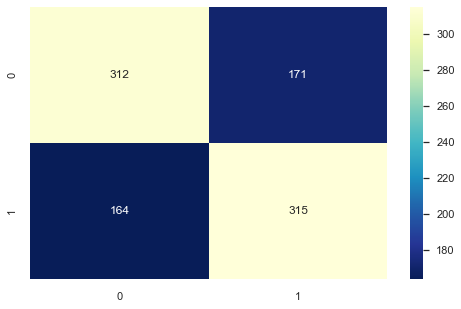

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="YlGnBu_r", annot=True, fmt=".0f");

## Baseline Model (Linear Regression)

In [ ]:
y = data['total_cost']
X = data.drop(['total_cost', 'package_accomodation', 'id', 'total_persons'], axis = 1)

In [ ]:
# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)

In [ ]:
#final_data = pd.get_dummies(X_train,columns=['age_group'],drop_first=True)

In [ ]:

X_baseline = X_train[['country', 'age_group']]#[['total_female', 'total_male', 'age_group']]
X_baseline_test = X_test[['country', 'age_group']]#['total_female', 'total_male', 'age_group']]

lin_reg = LinearRegression()
lin_reg.fit(X_baseline, y_train)

y_pred_train = lin_reg.predict(X_baseline)
y_pred_test = lin_reg.predict(X_baseline_test)

## Error Analyse

In [ ]:
print("Metrics on training data") 
print ('R2 Test:',r2_score(y_test, y_pred_test))
print('MAE Test:', np.sqrt(mean_absolute_error(y_test,y_pred_test)))
print('MAPE Test:', mean_absolute_percentage_error(y_test,y_pred_test))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test,y_pred_test)))


Metrics on training data
R2 Test: 0.09115700228765233
MAE Test: 2721.219126780206
MAPE Test: 9.817052527200023
RMSE Test: 11328213.981145332


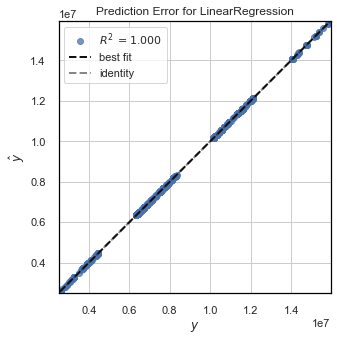

In [ ]:
# Instantiate the linear model and visualizer
# pip install yellowbrick
from yellowbrick.regressor import prediction_error
model = lin_reg
# visualizer = prediction_error(model, X_train, y_train, X_test, y_test)
visualizer = prediction_error(model, X_baseline, y_pred_train, X_baseline_test, y_pred_test)